# Assignment_3- Image Blurring and Sharpening

### Importing the libraries

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d
import warnings
warnings.filterwarnings('ignore')
import cv2 as cv
import pandas as pd

### Loading the Image: the image used here is a bridge located in eko, lagos nigeria.

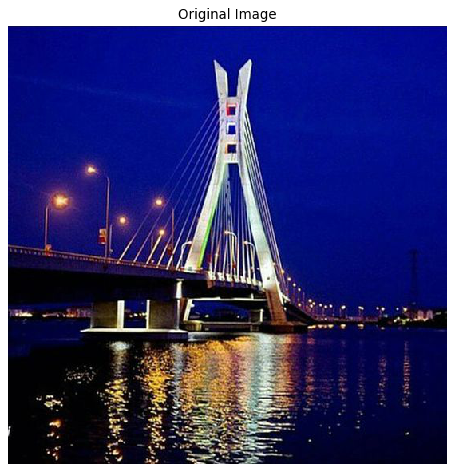

In [163]:
eko = imread('eko_bridge.jpg')
plt.figure(num=None, figsize=(6, 6), dpi=80)
plt.title('Original Image')
plt.axis('off')
imshow(eko)

### Applying the Gaussian Blur Kernel and the Sharpen Kernel:  we have defined two 3x3 matrices(sk for sharpen kernel and gbk for gaussian blur kernel). These matrices represent an image kernel to be used to apply the effects(blurring and sharpening). In this cell, we want to extract some features in the most useful portions of the image.


(-0.5, 2.5, 2.5, -0.5)

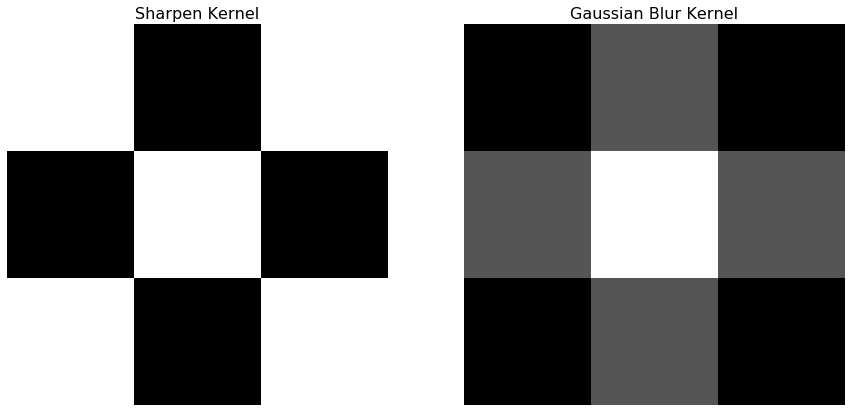

In [193]:
# Sharpen kernel


sk=np.array([[0, -1, 0], 
             [-1, 0, -1],
             [0, -1, 0]])
# Gaussian Blur kernel
gbk = (1 / 5.0) * np.array([[1., 2., 1.], 
                            [2., 4., 2.],
                            [1., 2., 1.]])


fig, ax = plt.subplots(1,2, figsize = (15,9))

ax[0].imshow(sk, cmap='gray')
ax[0].axis('off') 
ax[0].set_title(f'Sharpen Kernel', fontsize = 16)
   
ax[1].imshow(gbk, cmap='gray')
ax[1].set_title(f'Gaussian Blur Kernel', fontsize = 16)
ax[1].axis('off')   

### Creating a function to Convolve the Image: Convolution here implies, we will multiply the pixels with neighboring pixels color value by a matrix. Using the function multi_convolver() simply makes it easy for us to iterate through the kernels also by setting boundary=fill and fillvalue=0 in order to get a zero padded matrix as our output closer to original matrix.

In [194]:
def multi_convolver(img, k, it):
    for i in range(it):
        img = convolve2d(img, k, 'same', boundary = 'fill',
                           fillvalue = 0)
    return img
multi_convolver(eko, gbk, 2)

ValueError: convolve2d inputs must both be 2-D arrays

### Converting the image to a greyscale Image: Here, we have used the rgb2gray() function to convert truecolor image RGB to the grayscale image. by doing so, we have eliminated the hue and saturation characteristics so that we can retain the luminance.


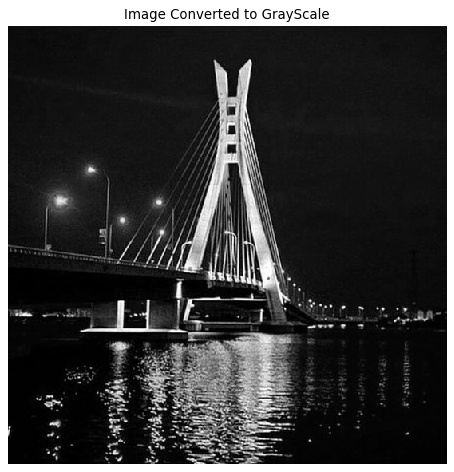

In [195]:
grayscale_eko = rgb2gray(eko)
plt.figure(num=None, figsize=(6, 6), dpi=80)
plt.axis('off')
plt.title('Image Converted to GrayScale')
imshow(grayscale_eko);

### Applying a 2D convolution to our 3D Matrix: To remove gaussian noise and add blurring(low pass filter) from the grayscale image, we have applied the convolution function on the gaussian blur kernel(gbk) with iteration value set at 5.

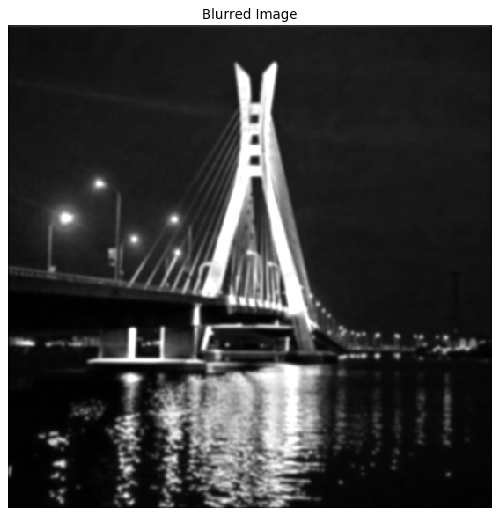

In [196]:
# for gaussian blur kernel

con_im = multi_convolver(grayscale_eko, gbk, 5)
plt.figure(num=None, figsize=(8, 8), dpi=80)
plt.axis('off')
plt.title('Blurred Image')

#save blurred image to current working directory
cv.imwrite('new_eko.jpg',con_im)

#display the saved blurred image
new_eko=cv.imread('new_eko.jpg')
plt.imshow(new_eko)

### Iterating through the gaussian blur Kernel convolution:  from the convolved image, To remove gaussian noise and add blurring(low pass filter) from the grayscale image, we have applied the convolution function on the gaussian blur kernel(gbk) by changing the iterations to varying values in order to observe the gradual blurring increase in the grayscale image as iteration changes.


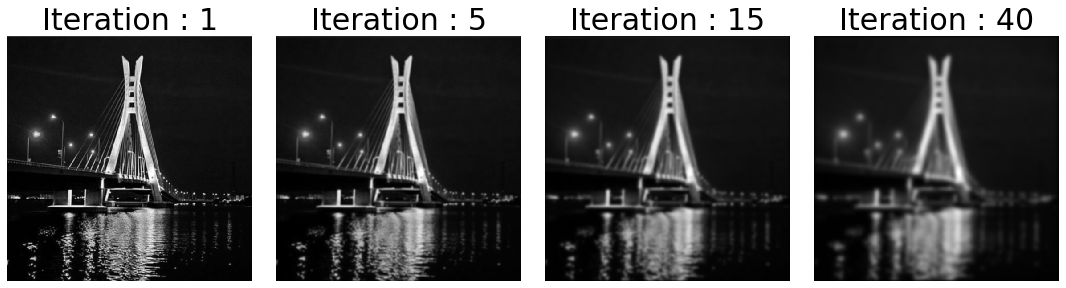

In [197]:
def convolution_plotter(img, k):
    it = [1,5,15,40]
    f_size = 30
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {it[n]}', fontsize = f_size)
        ax.imshow(multi_convolver(img, k, it[n]), cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()
    
convolution_plotter(grayscale_eko, gbk)

### Iterating through the  Kernel convolution for RGB(Retaining the Color): To remove gaussian noise and add blurring(low pass filter) from the RGB image, we have applied the convolution function on the gaussian blur kernel(gbk) with iteration value set at 4.

In [198]:
def convolver_rgb(img, k, it=1):
    r = multi_convolver(img[:,:,0], k,it)
    g = multi_convolver(img[:,:,1], k, it)
    b  = multi_convolver(img[:,:,2], k, it)
    
    rgb = np.dstack((np.rint(abs(r)), np.rint(abs(g)),np.rint(abs(b))))/255
   
                               
                     
    fig, ax = plt.subplots(1,3, figsize = (17,10))
    
    ax[0].imshow(abs(r), cmap='Reds')
    ax[0].set_title(f'Red Eko Bridge', fontsize = 15)
    
    ax[1].imshow(abs(g), cmap='Greens')
    ax[1].set_title(f'Green Eko Bridge', fontsize = 15)
    
    ax[2].imshow(abs(b), cmap='Blues')
    ax[2].set_title(f'Blue Eko Bridge', fontsize = 15)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    return np.array(rgb).astype(np.uint8)

### Applying Gaussian Blur Kernel on the Image

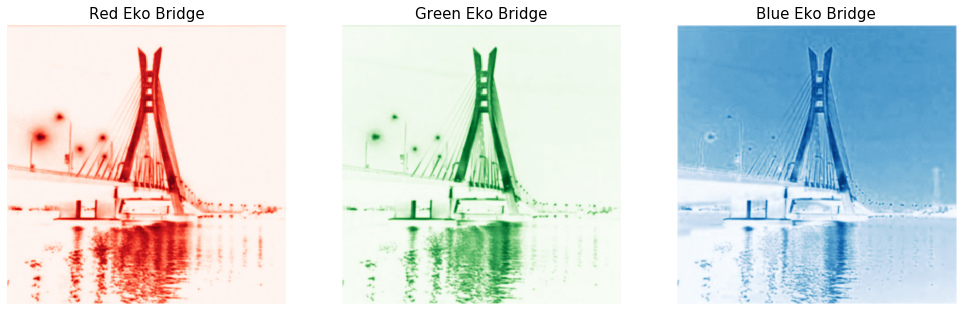

In [199]:
rgb_gaussian = convolver_rgb(eko, gbk, 4)

### Reformed Image: Reformed result after convolution function on the gaussian blur kernel(gbk) on RGB image

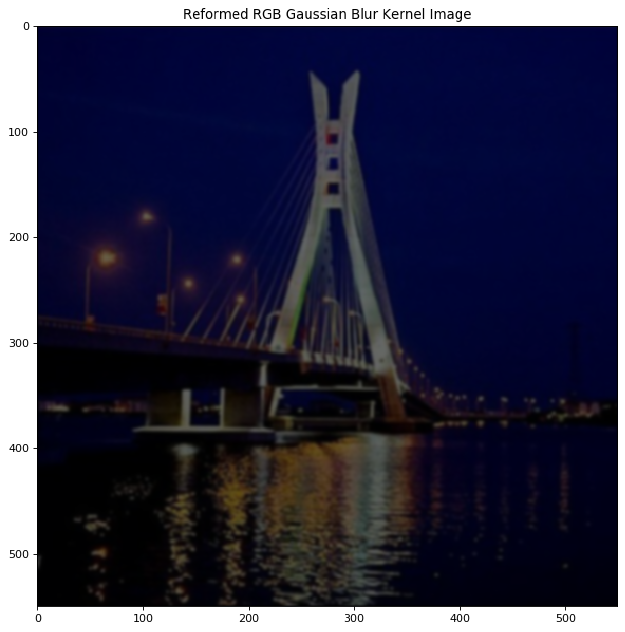

In [200]:
plt.figure(num=None, figsize=(8, 8), dpi=80)
plt.title('Reformed RGB Gaussian Blur Kernel Image')
imshow(rgb_gaussian)

### Applying Sharpen Kernel on the Image:  To remove gaussian noise and improve sharpness from the RGB image, we have apllied the convolution function on the sharpen kernel(sk) with iteration value set at 4.

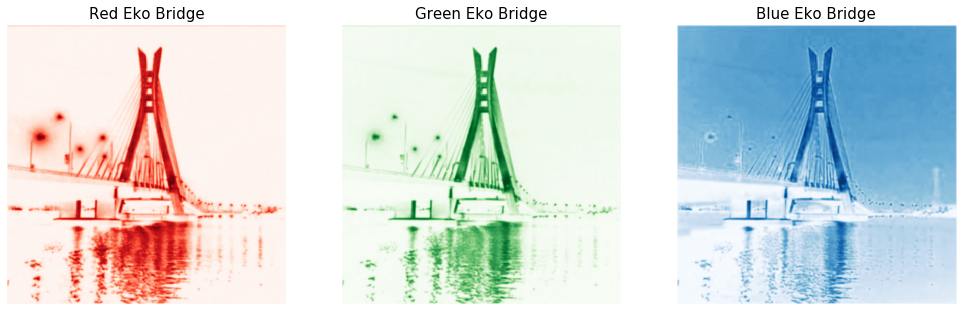

In [201]:
rgb_sharpen = convolver_rgb(eko, sk,4)

### Reformed Image: Reformed result after convolution function on the sharpen kernel(sk) on RGB image

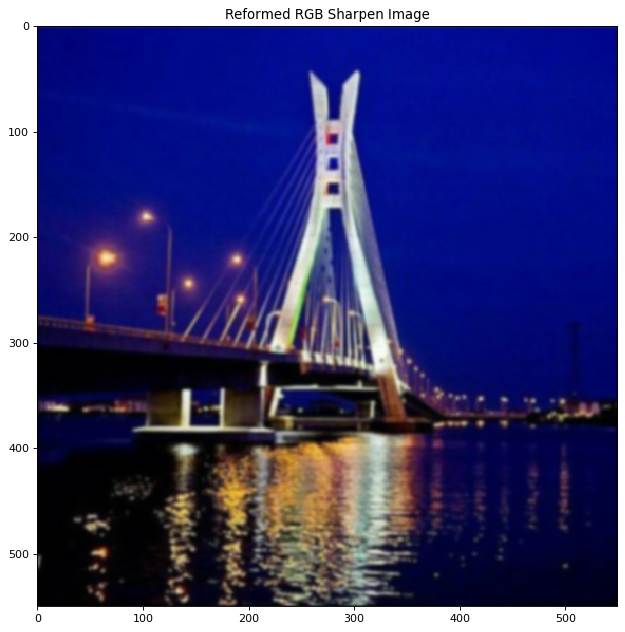

In [202]:
plt.figure(num=None, figsize=(8, 8), dpi=80)
plt.title('Reformed RGB Sharpen Image')
imshow(rgb_sharpen)

### Using the Y'UV color space:  To remove gaussian noise and improve  sharpness from an image using Y'UV color space; First, we need to convert the image from RGB color space into Y'UV color space. by applying the convolution function on the sharpen kernel(sk) with iteration value set at 2. Finally, I have divided the ouput pixels by 25 to get below YUV adjusted image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


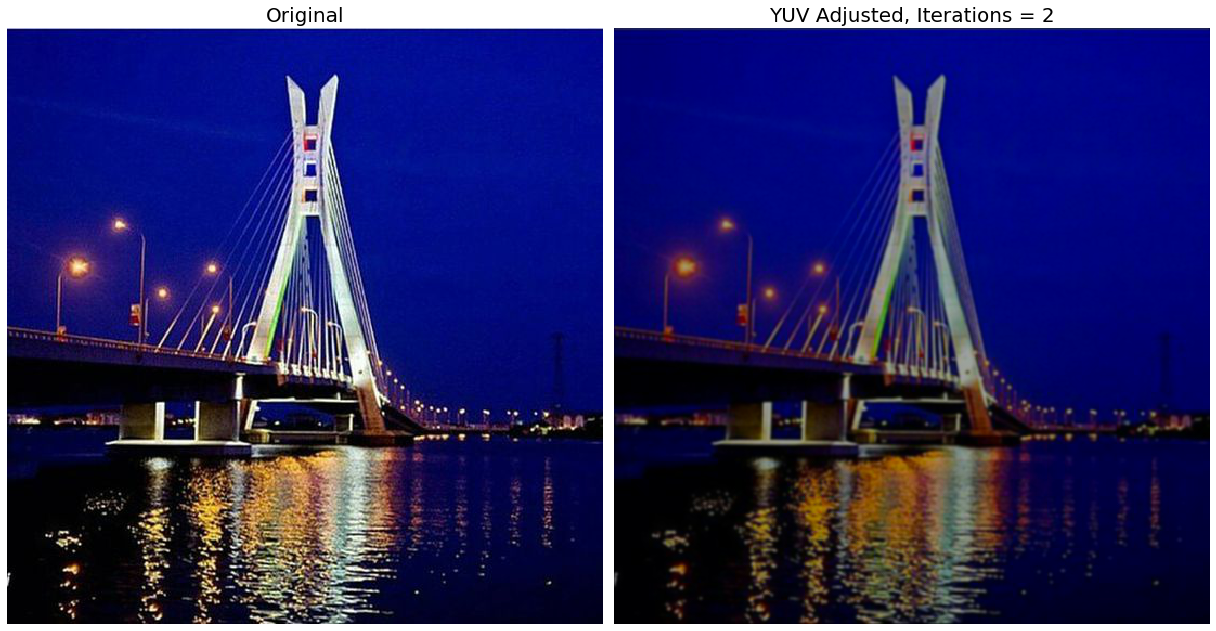

In [236]:
def convolver_rgb(img, k, it = 1):
    img_yuv = rgb2yuv(img)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], k, it)/25
    #img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], k, it)
    final_image = yuv2rgb(img_yuv)
                               
    fig, ax = plt.subplots(1,2, figsize = (17,10))
    
    ax[0].imshow(img)
    ax[0].set_title(f'Original', fontsize = 20)
    
    ax[1].imshow(final_image);
    ax[1].set_title(f'YUV Adjusted, Iterations = {it}', fontsize = 20)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()
    
    return final_image
final_image = convolver_rgb(eko, sk, it =2)

### Comparing the HSV and Y’UV over the original RGB:  To remove gaussian noise and improve sharpeness from an image using Y'UV color space and HSV color space. First, RGB color space by separating and combining RGB channels in NumPy array all divided by 255. Second, we have to convert the image from RGB color space into Y'UV color space. Third, we have to convert the image from RGB color space into HSV color space.     By applying the convolution function on the sharpen kernel(sk) with iteration value set at 2.   Finally, I have divided the ouput pixels values of both Y'UV & HSV  by 25.

In [234]:
def convolver_comparison(img, k, it = 1):
    img_yuv = rgb2yuv(img)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], k, it)/25
    #img_yuv[:,:,1] = multi_convolver(img_yuv[:,:,1], k, it)
    final_image_yuv = yuv2rgb(img_yuv)
    
    img_hsv = rgb2hsv(img)   
    img_hsv[:,:,2] = multi_convolver(img_hsv[:,:,2], k, it)/25
    #img_hsv[:,:,0] = multi_convolver(img_hsv[:,:,0], k, it)
    final_image_hsv = hsv2rgb(img_hsv)
    
    
    
    r = multi_convolver(img[:,:,0], k, it)
    g= multi_convolver(img[:,:,1], k, it)
    b = multi_convolver(img[:,:,2], k, it)
    
    rgb = np.dstack((np.rint(abs(r)),  np.rint(abs(g)),  np.rint(abs(b)))) / 255
                               
    fig, ax = plt.subplots(2,2, figsize = (17,17))
    
    ax[0][0].imshow(img)
    ax[0][0].set_title(f'Original', fontsize = 30)
    
    ax[0][1].imshow(rgb);
    ax[0][1].set_title(f'RGB Adjusted, Iterations = {it}', fontsize = 30)
    fig.tight_layout()
    
    ax[1][0].imshow(final_image_yuv)
    ax[1][0].set_title(f'YUV Adjusted, Iterations = {it}', fontsize = 30)
    
    ax[1][1].imshow(final_image_hsv)
    ax[1][1].set_title(f'HSV Adjusted, Iterations = {it}', fontsize = 30)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


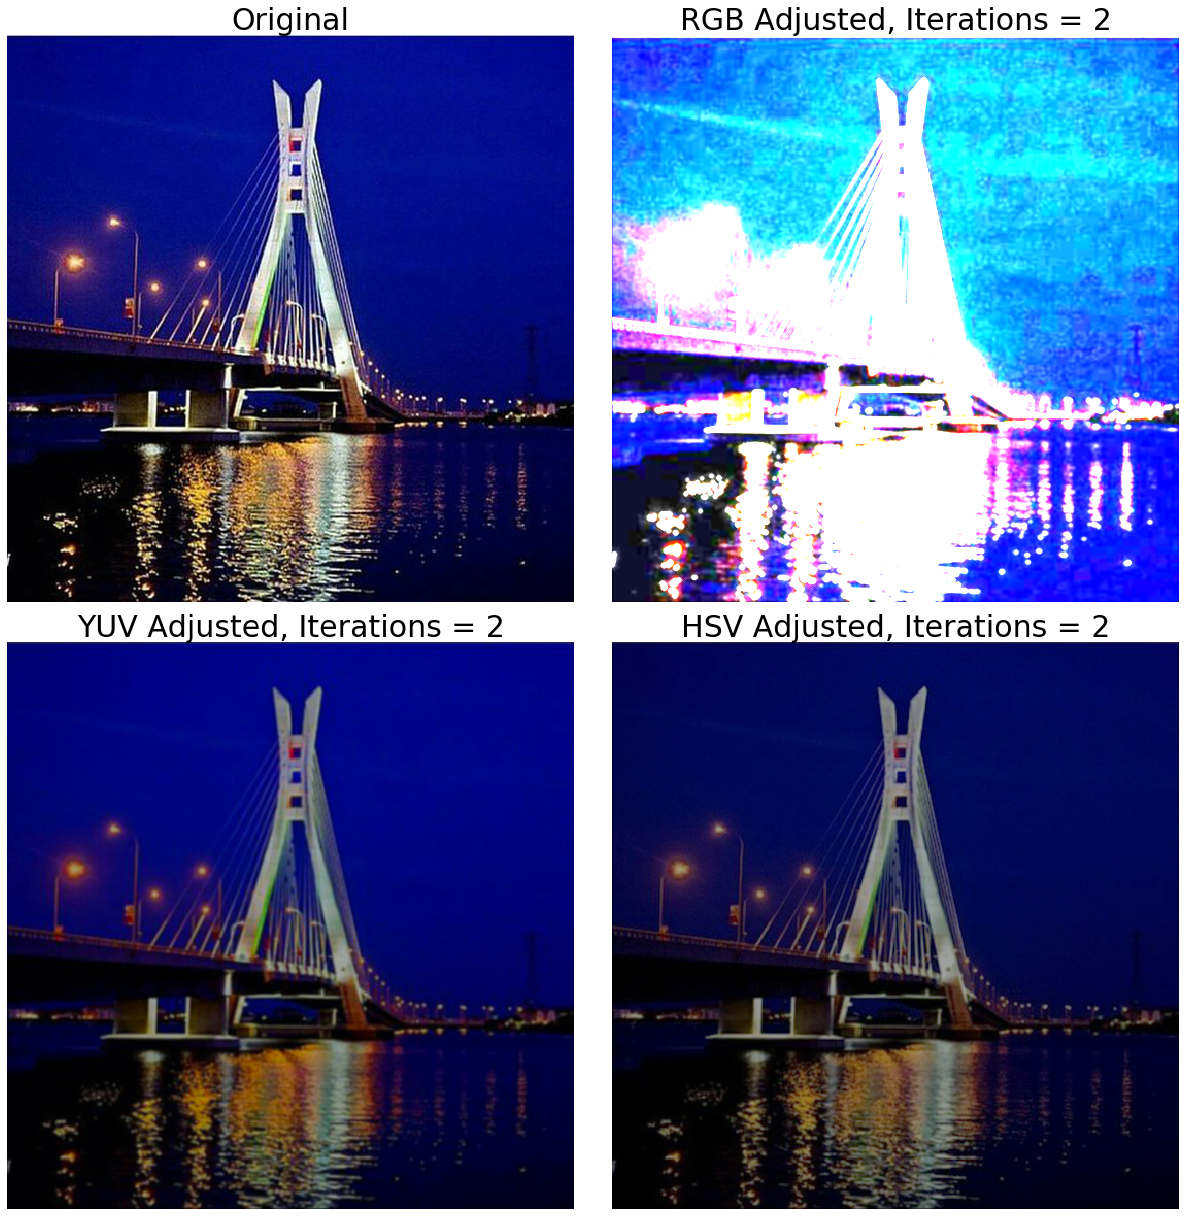

In [235]:
convolver_comparison(eko, sk, it = 2)

### Conclusion: We have implemented digital image processing techniques for blurring and sharpening of an image with the help of different color spaces such as: 1. Grayscale image, 2. RGB color space, 3. Y'UV color space, and  4 HSV color space. From our comparison, it is obvious that RGB color space may not be suitable in smoothing(blurring or sharpening) a given image. therefore, we may apply color spaces such as Y'UV or HSV to get an image close to the original image.